<a href="https://colab.research.google.com/github/seema-singh743/Heart-Disease-Prediction-Using-Machine-learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving heartdata.csv to heartdata (1).csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
df = pd.read_csv('heartdata.csv')
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [10]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [12]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [13]:
df["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
df["target"].unique()

array([1, 0])

target
1    165
0    138
Name: count, dtype: int64


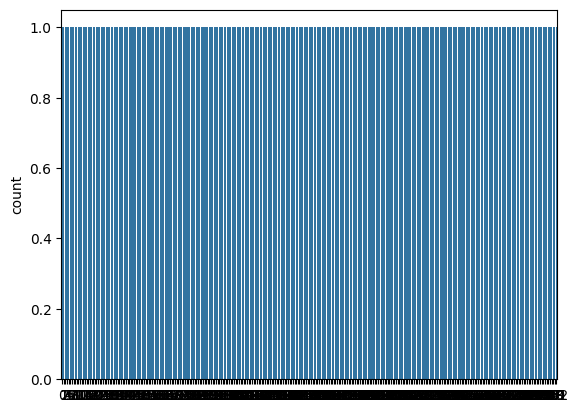

In [15]:
y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [17]:
df["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

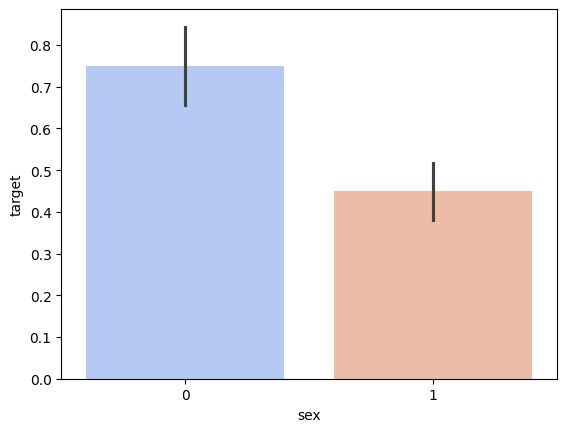

In [18]:
sns.barplot(x=df["sex"],y=y, hue=df["sex"], palette="coolwarm", legend=False)

In [19]:
df["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

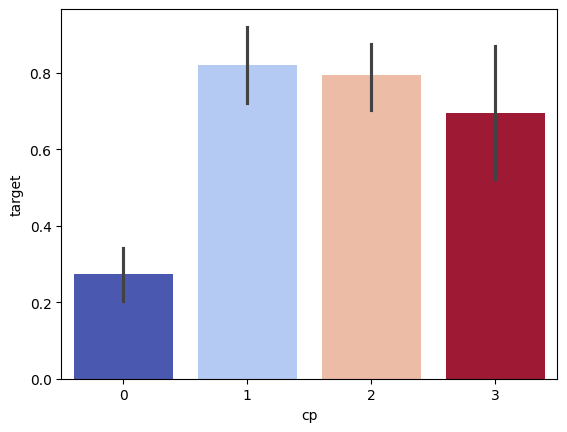

In [20]:
sns.barplot(x=df["cp"],y=y,hue=df["cp"], palette="coolwarm", legend=False)

In [21]:
df["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
df["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

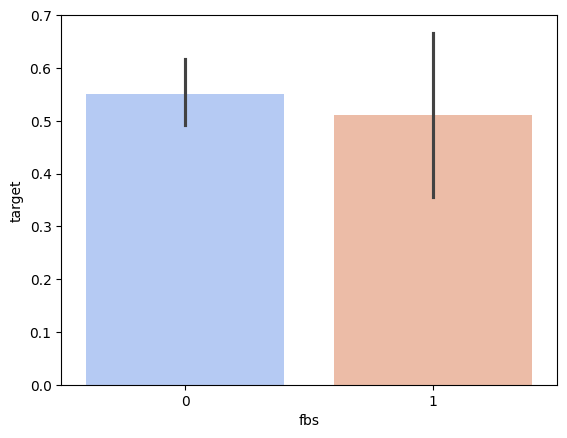

In [23]:
sns.barplot(x=df["fbs"],y=y,hue=df["fbs"], palette="coolwarm", legend=False)

In [24]:
df["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

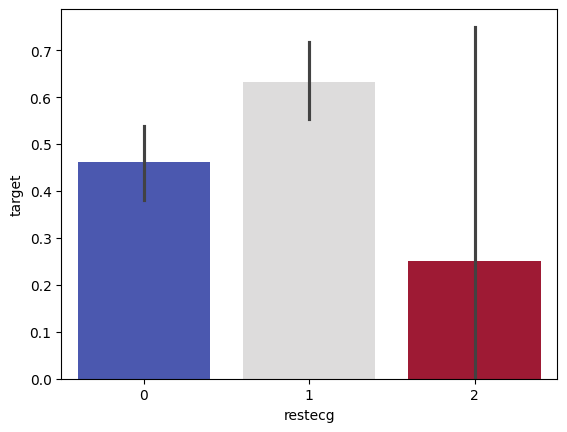

In [25]:
sns.barplot(x=df["restecg"],y=y,hue=df["restecg"], palette="coolwarm", legend=False)

In [26]:
df["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

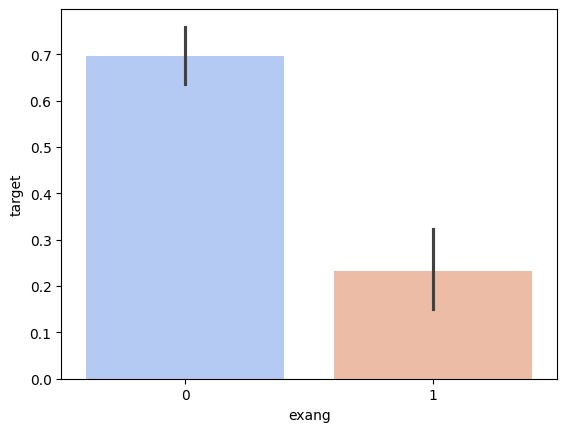

In [27]:
sns.barplot(x=df["exang"],y=y,hue=df["exang"], palette="coolwarm", legend=False)

In [28]:
df["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

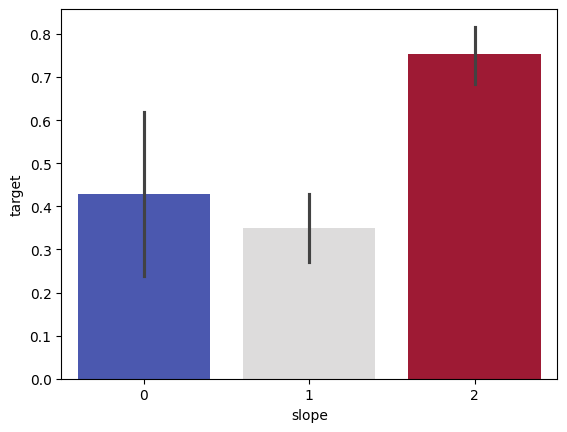

In [29]:
sns.barplot(x=df["slope"],y=y,hue=df["slope"], palette="coolwarm", legend=False)

In [30]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

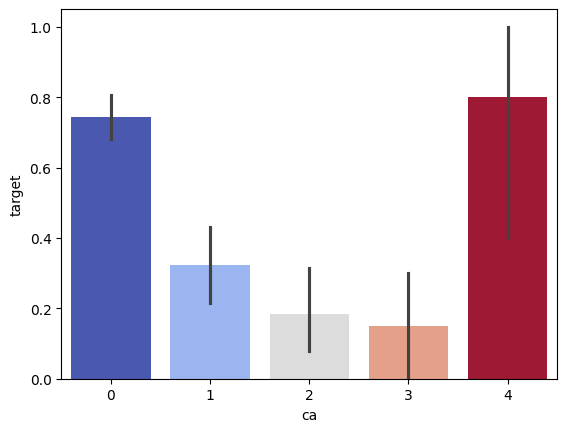

In [31]:
sns.barplot(x=df["ca"],y=y,hue=df["ca"], palette="coolwarm", legend=False)

In [32]:
df["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

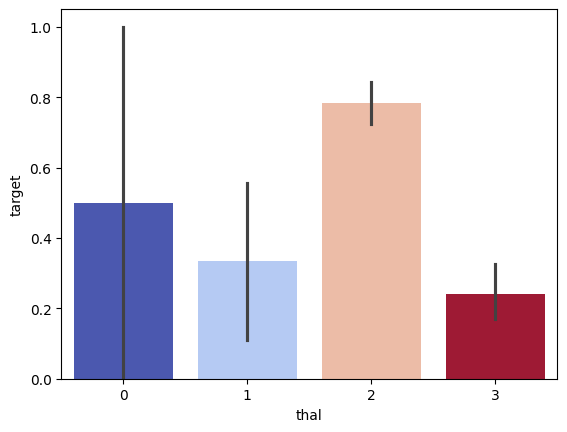

In [33]:
sns.barplot(x=df["thal"],y=y, hue=df["thal"], palette="coolwarm", legend=False)

In [34]:
X = df.drop("target", axis=1)
y = df["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

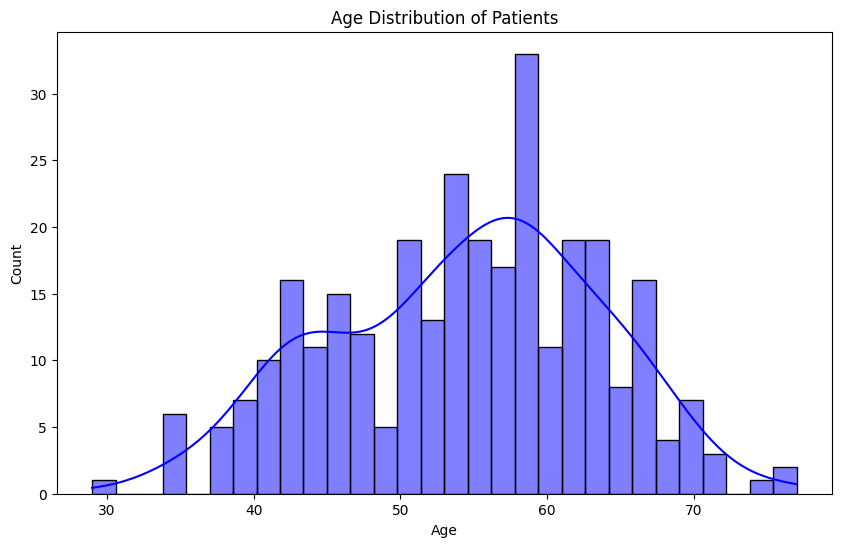

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

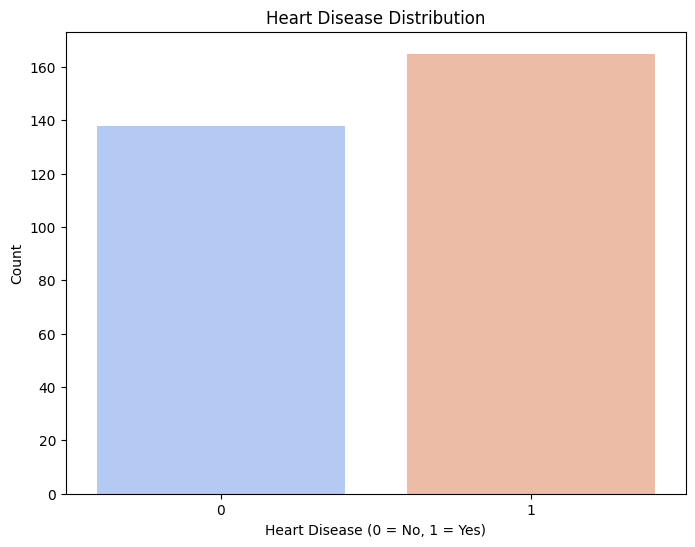

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x="target", data=df, hue="target", palette="coolwarm", legend=False)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

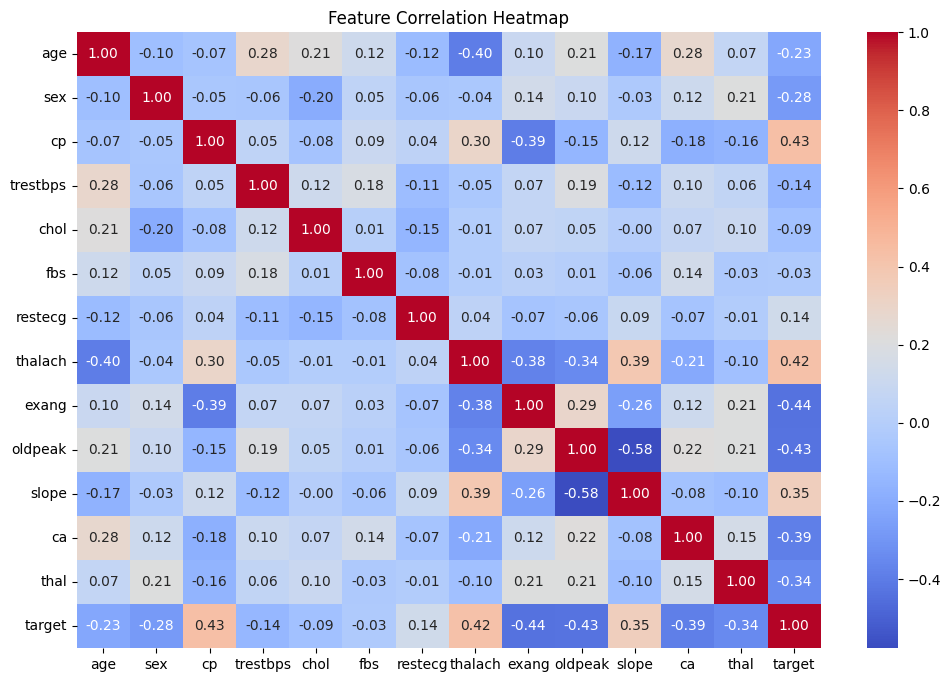

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Model Accuracy: 0.84

Confusion Matrix:
[[24  5]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



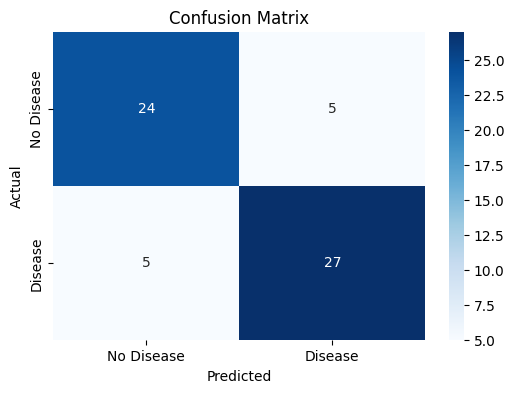

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [47]:
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Logistic Regression Model Performance:
Accuracy: 0.85
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



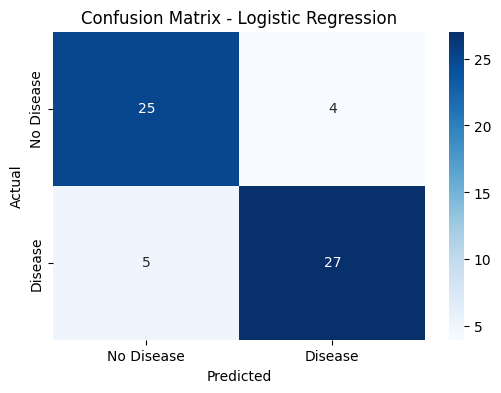

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [49]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [51]:
print("\nSupport Vector Machine (SVM) Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Support Vector Machine (SVM) Model Performance:
Accuracy: 0.87
Confusion Matrix:
[[26  3]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



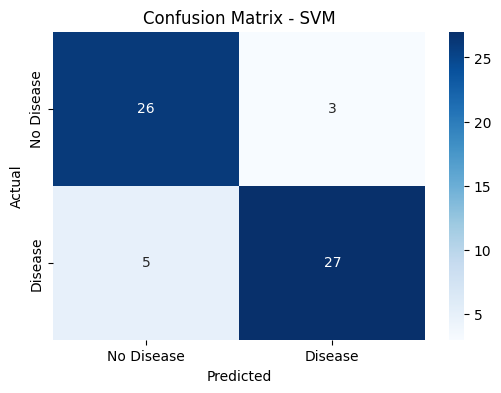

In [52]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"\n{DecisionTreeClassifier} Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


<class 'sklearn.tree._classes.DecisionTreeClassifier'> Model Performance:
Accuracy: 0.87
Confusion Matrix:
[[26  3]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



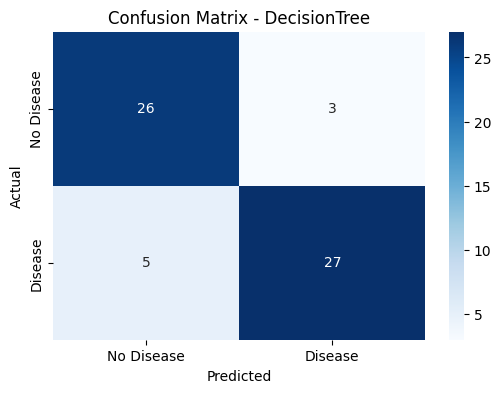

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DecisionTree")
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [57]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    plt.figure(figsize=(6,4))

In [58]:
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)


K-Nearest Neighbors Model Performance:
Accuracy: 0.90
Confusion Matrix:
[[27  2]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<Figure size 600x400 with 0 Axes>

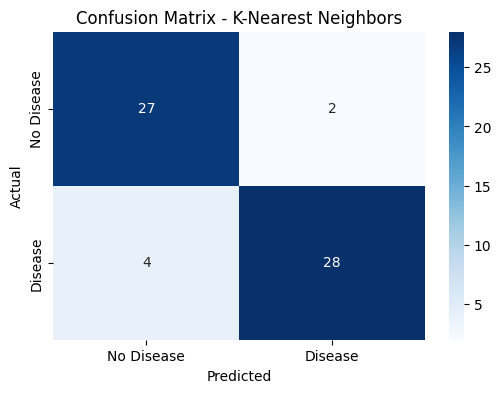

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

In [60]:
pip install xgboost

In [61]:
pip install tensorflow

In [62]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [64]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
optimizer = Adam(learning_rate=0.001)
nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [66]:
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4698 - loss: 0.7038 - val_accuracy: 0.6735 - val_loss: 0.6279
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6620 - loss: 0.6098 - val_accuracy: 0.7551 - val_loss: 0.5344
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8048 - loss: 0.5378 - val_accuracy: 0.7755 - val_loss: 0.4577
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8216 - loss: 0.4817 - val_accuracy: 0.7755 - val_loss: 0.4128
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7948 - loss: 0.4628 - val_accuracy: 0.7551 - val_loss: 0.4138
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8058 - loss: 0.4065 - val_accuracy: 0.7755 - val_loss: 0.4189
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8750 - loss: 0.3413 - val_accuracy: 0.7755 - val_loss: 0.3892
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8483 - loss: 0.3320 - val_accuracy: 0.7755 - v

In [67]:
nn_preds = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))
print(classification_report(y_test, nn_preds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Neural Network Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [68]:
results = {}
def print_result(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")


In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)
print_result("Logistic Regression", y_test, model.predict(X_test))
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print_result("KNN", y_test, model.predict(X_test))
model = SVC()
model.fit(X_train, y_train)
print_result("SVM", y_test, model.predict(X_test))
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print_result("Decision Tree", y_test, model.predict(X_test))
model = RandomForestClassifier()
model.fit(X_train, y_train)
print_result("Random Forest", y_test, model.predict(X_test))
model = XGBClassifier()
model.fit(X_train, y_train)
print_result("XGBoost", y_test, model.predict(X_test))
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy']) # removed optimizer=optimizer
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
y_pred_model = model.predict(X_test)
y_pred_model = (y_pred_model > 0.5).astype("int32").flatten()
print_result("Neural Network", y_test, y_pred_model)
print("\n--- Accuracy Scores for Each Model ---")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Logistic Regression: 0.8525
KNN: 0.9016
SVM: 0.8689
Decision Tree: 0.8197
Random Forest: 0.8525
XGBoost: 0.8197
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5545 - loss: 0.6890 - val_accuracy: 0.7551 - val_loss: 0.5921
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7463 - loss: 0.5822 - val_accuracy: 0.7755 - val_loss: 0.5072
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8129 - loss: 0.5117 - val_accuracy: 0.8163 - val_loss: 0.4481
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8018 - loss: 0.4607 - val_accuracy: 0.7959 - val_loss: 0.4171
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8375 - loss: 0.4122 - val_accuracy: 0.8163 - val_loss: 0.3996
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8538 - loss: 0.3873 - val_accuracy: 0.8367 - val_loss: 0.3865
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8468 - loss: 0.3431 - val_accuracy: 0.8571 - val_loss: 0.3808
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8559 - loss: 0.3311 - val_accuracy: 0.7959 - val_loss: 0.3928
E

In [70]:
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values(by='Accuracy', ascending=False)

<ipython-input-71-034f91fa3b75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', edgecolor='black')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'XGBoost'),
  Text(6, 0, 'Neural Network')])

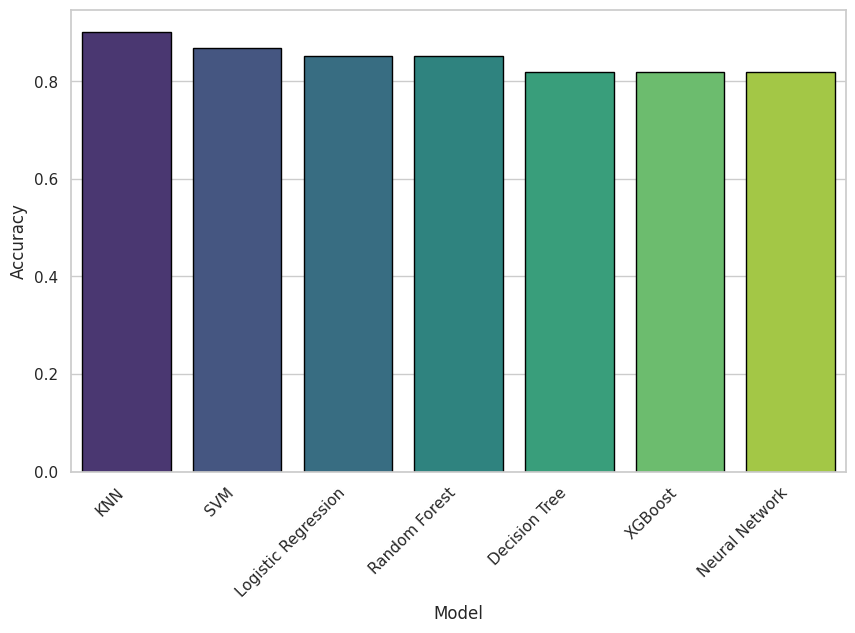

In [71]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', edgecolor='black')
plt.xticks(rotation=45, ha='right')


In [72]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')
print("Model saved as heart_disease_model.pkl")

Model saved as heart_disease_model.pkl
